# MultiLabel Classification

## Import Libraries

In [67]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import hamming_loss, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict

## Load the data set and split

In [2]:
mnist = fetch_openml("mnist_784", version =1, as_frame = False)

C:\Users\ayush\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
X, y = mnist['data'], mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

y_train = y_train.astype(np.int64)

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((56000, 784), (56000,), (14000, 784), (14000,))

## Create a MultiLabel foreach digit :
1. Larger than or Equal to 7
2. Odd number or not

In [12]:
y_train_large = (y_train>=7)
y_train_odd = (y_train % 2 == 1)

In [14]:
y_train_mod = np.c_[y_train_large, y_train_odd]

In [16]:
y_train_mod[:10]

array([[False,  True],
       [False, False],
       [ True, False],
       [False, False],
       [False, False],
       [False, False],
       [False,  True],
       [False, False],
       [ True, False],
       [False,  True]])

## Train KNN classifier using this dataset

In [17]:
knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_train_mod)

KNeighborsClassifier()

## Make Predictions

In [40]:
some_digit = X[36000]
some_digit.reshape(1,-1).shape

(1, 784)

In [41]:
knn_clf.predict([some_digit])

array([[ True,  True]])

In [68]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train_mod, cv =3)

## Calculate F1, Hamming Loss and Accuracy Score, Weighted F1

In [69]:
f1_score(y_train_mod, y_train_knn_pred, average = "macro")

0.9759770524441203

In [71]:
hamming_loss(y_train_mod, y_train_knn_pred)

0.01811607142857143

In [72]:
accuracy_score(y_train_mod, y_train_knn_pred)

0.9745892857142857

In [75]:
f1_score(y_train_mod, y_train_knn_pred, average="weighted")

0.9775627796386813

## MultiOutput Classification

## Adding Noise to the images

In [130]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
#X_train_mod == X_train # Shows noise is added

In [131]:
noise = np.random.randint(0, 100, (len(X_test),784))
X_test_mod = X_test + noise

#### Now make the earlier X train and test as y train and test as the goal is to remove noise from the images using classification

In [132]:
y_train = X_train
y_test = X_test

## Plot the images

In [133]:
import matplotlib.pyplot as plt

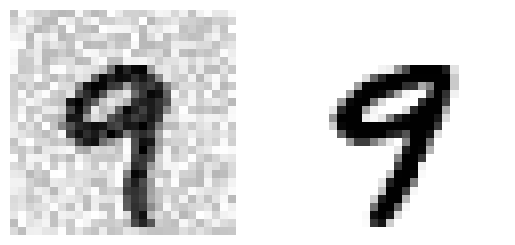

In [135]:
X_test_mod_img = X_train_mod[4500].reshape(28, 28)
plt.subplot(121);
plt.imshow(X_test_mod_img, cmap= plt.cm.binary, interpolation="nearest")
plt.axis("off");

y_test_img = y_test[4500].reshape(28, 28)
plt.subplot(122);
plt.imshow(y_test_img, cmap = plt.cm.binary, interpolation="nearest")
plt.axis("off");

## Fit the model 

In [136]:
knn_clf.fit(X_train_mod, y_train)

KNeighborsClassifier()

In [141]:
clean_digit = knn_clf.predict([X_test_mod[4500]])

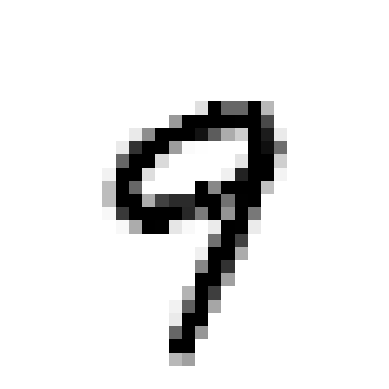

In [142]:
plt.imshow(clean_digit.reshape(28,28), cmap = plt.cm.binary, interpolation="nearest")
plt.axis("off");